In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import matplotlib.pyplot as plt

In [18]:
os.chdir("C:\\Users\\Seijsener\\Ironhack\\unit4\\week_9")

In [19]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [20]:
print(customer_df.head())

  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [21]:
print(customer_df.tail())

     Customer       State  Customer Lifetime Value Response  Coverage  \
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
9129  Bachelor           2/10/11         Employed      M   71941  ...   
9130   College           2/12/11         Employed      F   21604  ...   
9131  Bachelor            2/6/11       Unemployed      M       0  ...   
9132   College            2/3/11         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
9129                            89                        

In [22]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [23]:
column_mapping = {
    'Customer': 'customer',
    'State': 'state',
    'Customer Lifetime Value': 'customer_lifetime_value',
    'Response': 'response',
    'Coverage': 'coverage',
    'Education': 'education',
    'Effective To Date': 'effective_to_date',
    'EmploymentStatus': 'employment_status',
    'Gender': 'gender',
    'Income': 'income',
    'Location Code': 'location_code',
    'Marital Status': 'marital_status',
    'Monthly Premium Auto': 'monthly_premium_auto',
    'Months Since Last Claim': 'months_since_last_claim',
    'Months Since Policy Inception': 'months_since_policy_inception',
    'Number of Open Complaints': 'number_of_open_complaints',
    'Number of Policies': 'number_of_policies',
    'Policy Type': 'policy_type',
    'Policy': 'policy',
    'Renew Offer Type': 'renew_offer_type',
    'Sales Channel': 'sales_channel',
    'Total Claim Amount': 'total_claim_amount',
    'Vehicle Class': 'vehicle_class',
    'Vehicle Size': 'vehicle_size'
}

customer_df.rename(columns=column_mapping, inplace=True)

In [24]:
print(customer_df.head())

  customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employment_status gender  income  ...  \
0           2/24/11          Employed      F   56274  ...   
1           1/31/11        Unemployed      F       0  ...   
2           2/19/11          Employed      F   48767  ...   
3           1/20/11        Unemployed      M       0  ...   
4            2/3/11          Employed      M   43836  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0              

In [25]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

categorical_columns = ['state', 'response', 'coverage', 'education', 'employment_status', 'gender',
                        'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type',
                        'sales_channel', 'vehicle_class', 'vehicle_size']

customer_df[categorical_columns] = customer_df[categorical_columns].astype('category')

C:\Users\Seijsener\AppData\Local\Temp\ipykernel_19016\3701989182.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [26]:
print(customer_df.dtypes)

customer                                 object
state                                  category
customer_lifetime_value                 float64
response                               category
coverage                               category
education                              category
effective_to_date                datetime64[ns]
employment_status                      category
gender                                 category
income                                    int64
location_code                          category
marital_status                         category
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                            category
policy                                 category
renew_offer_type                       category
sales_channel                          c

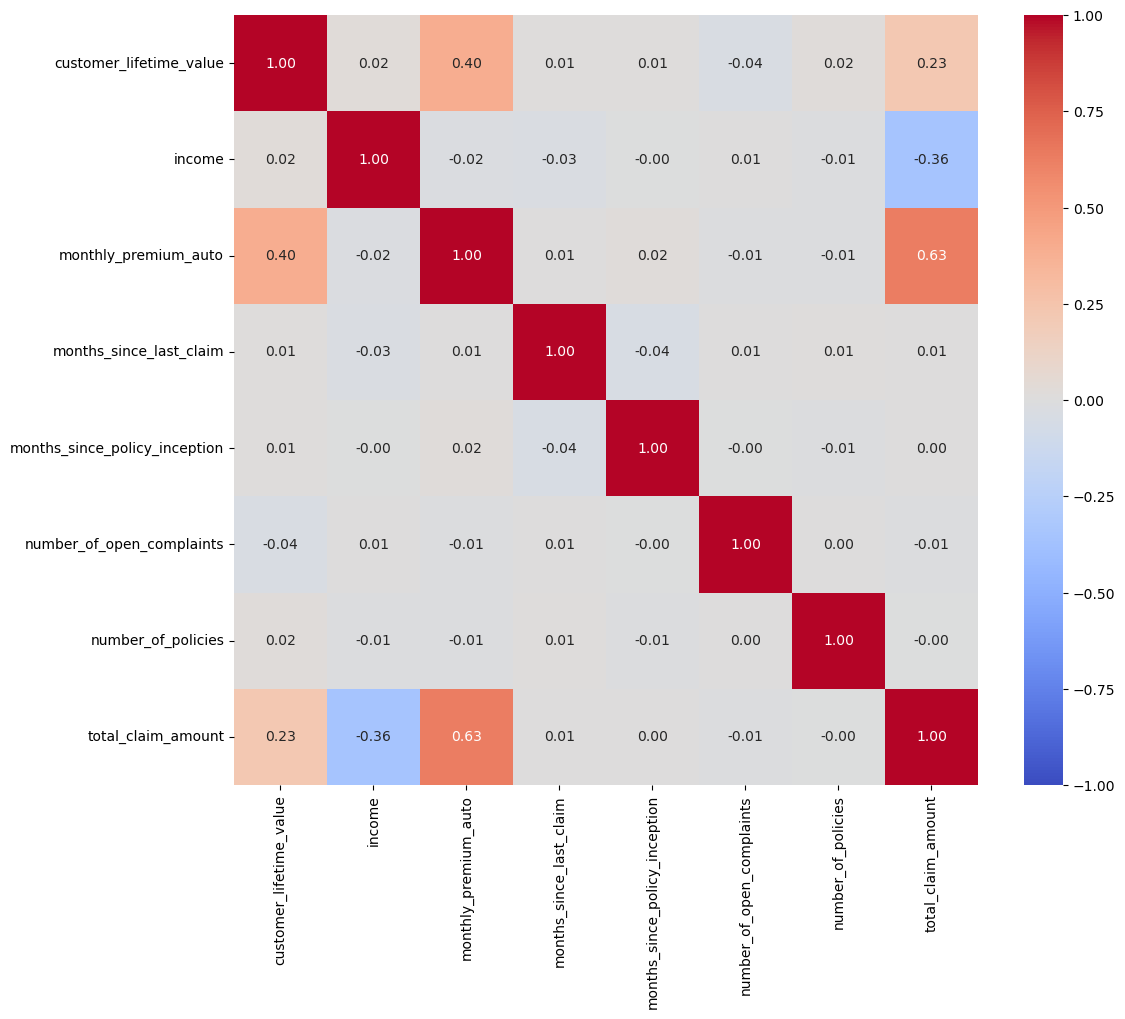

In [27]:
numeric_df = customer_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

there are generally no strong correlations among the variables. Most of the correlations are close to zero or very small in magnitude, indicating weak or negligible linear relationships between the variables. This suggests that the variables are not strongly dependent on each other in a linear manner.

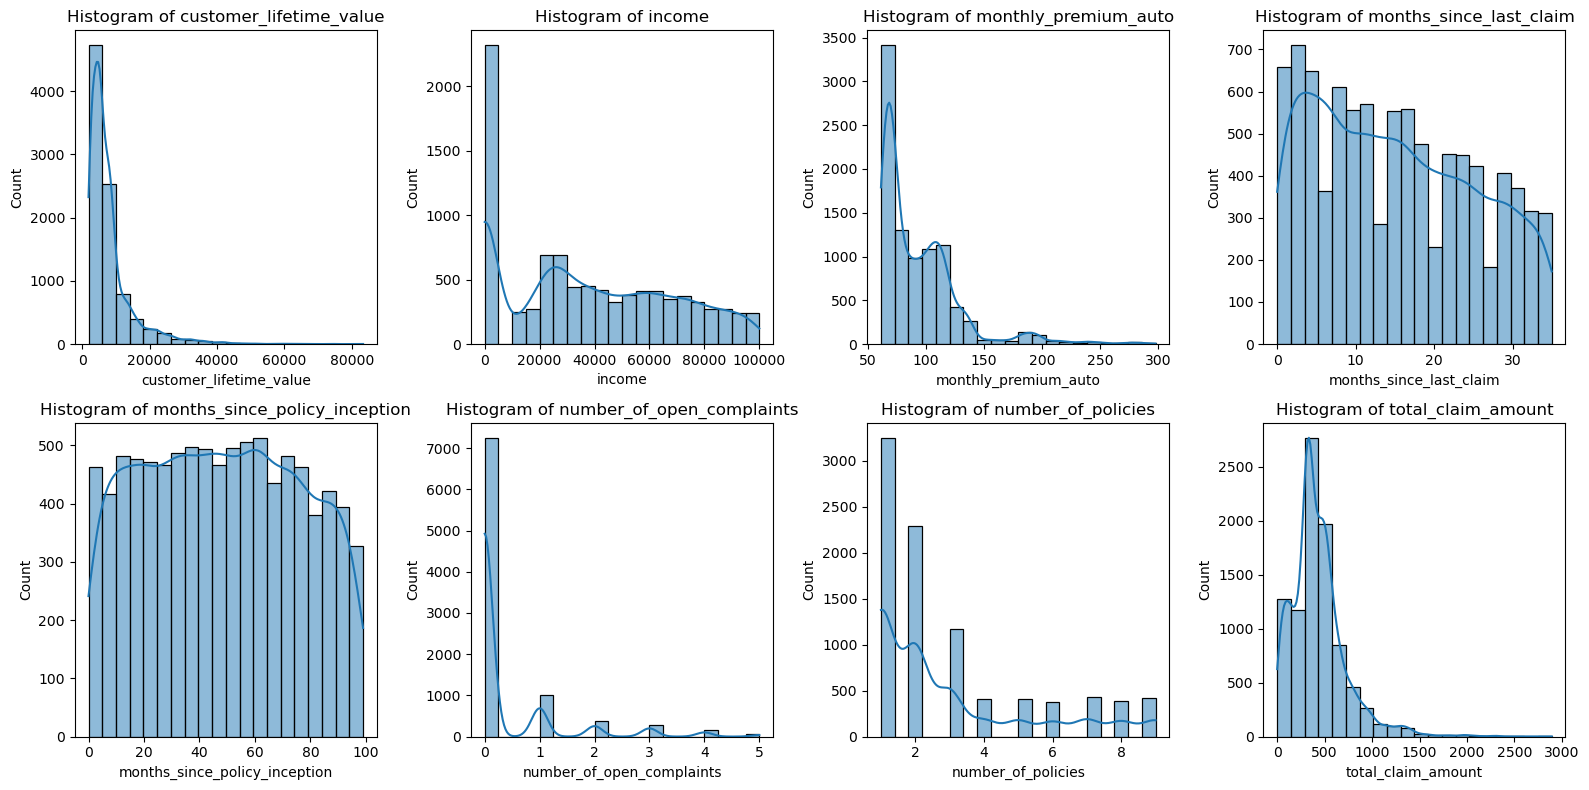

In [28]:
continuous_variables = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
                         'months_since_last_claim', 'months_since_policy_inception',
                         'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, variable in enumerate(continuous_variables):
    sns.histplot(customer_df[variable], ax=axes[i], bins=20, kde=True)
    axes[i].set_title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()

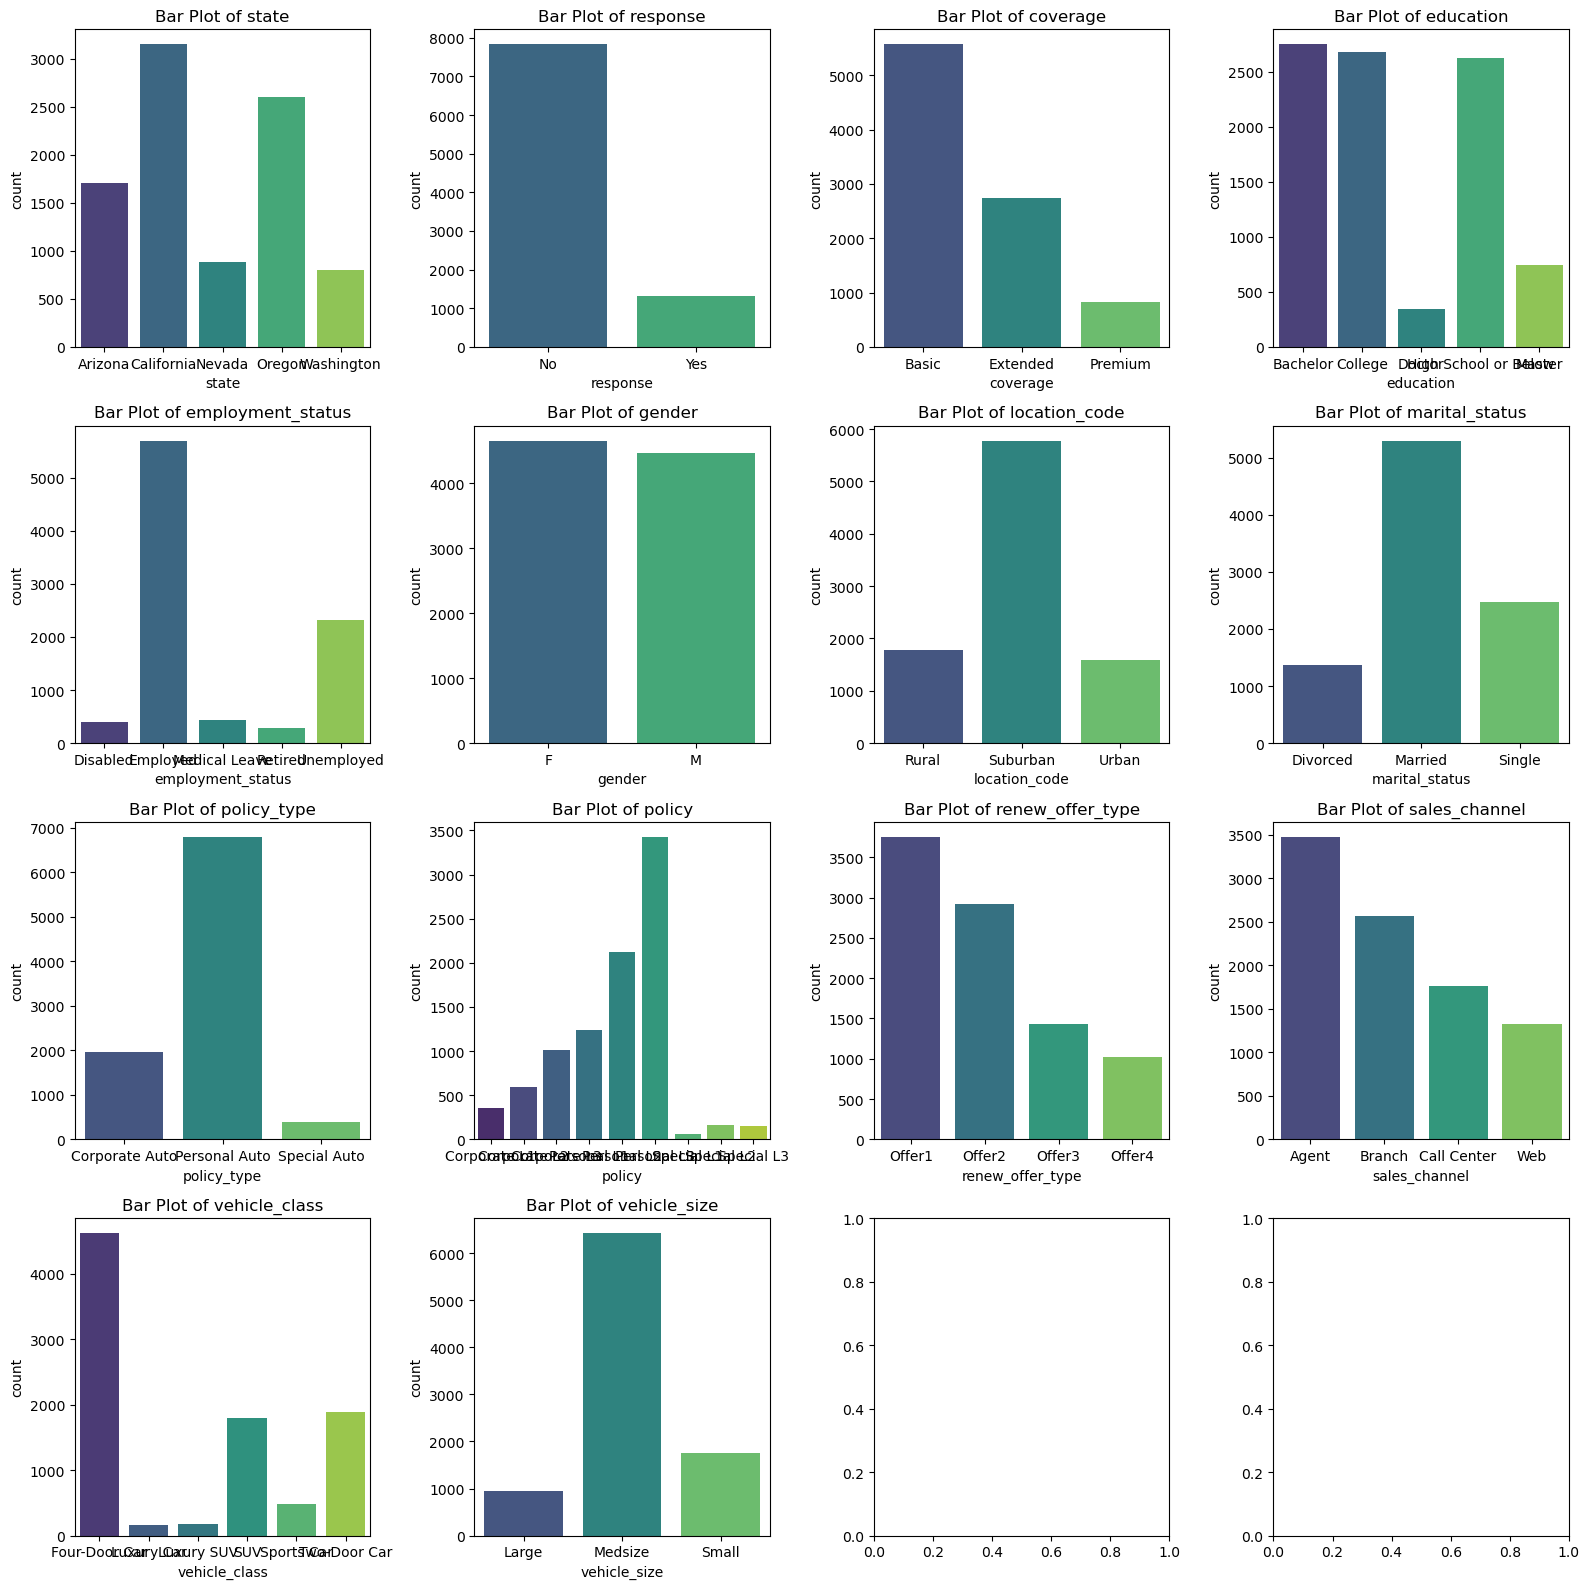

In [33]:
customer_df.drop('customer', axis=1, inplace=True)

categorical_columns = customer_df.select_dtypes(include=['category']).columns
num_subplots = len(categorical_columns)
num_rows = (num_subplots // 4) + 1
num_cols = min(num_subplots, 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))
axes = axes.flatten()

for i, variable in enumerate(categorical_columns):
    sns.countplot(x=variable, data=customer_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Bar Plot of {variable}')

plt.tight_layout()
plt.show()

In [32]:
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


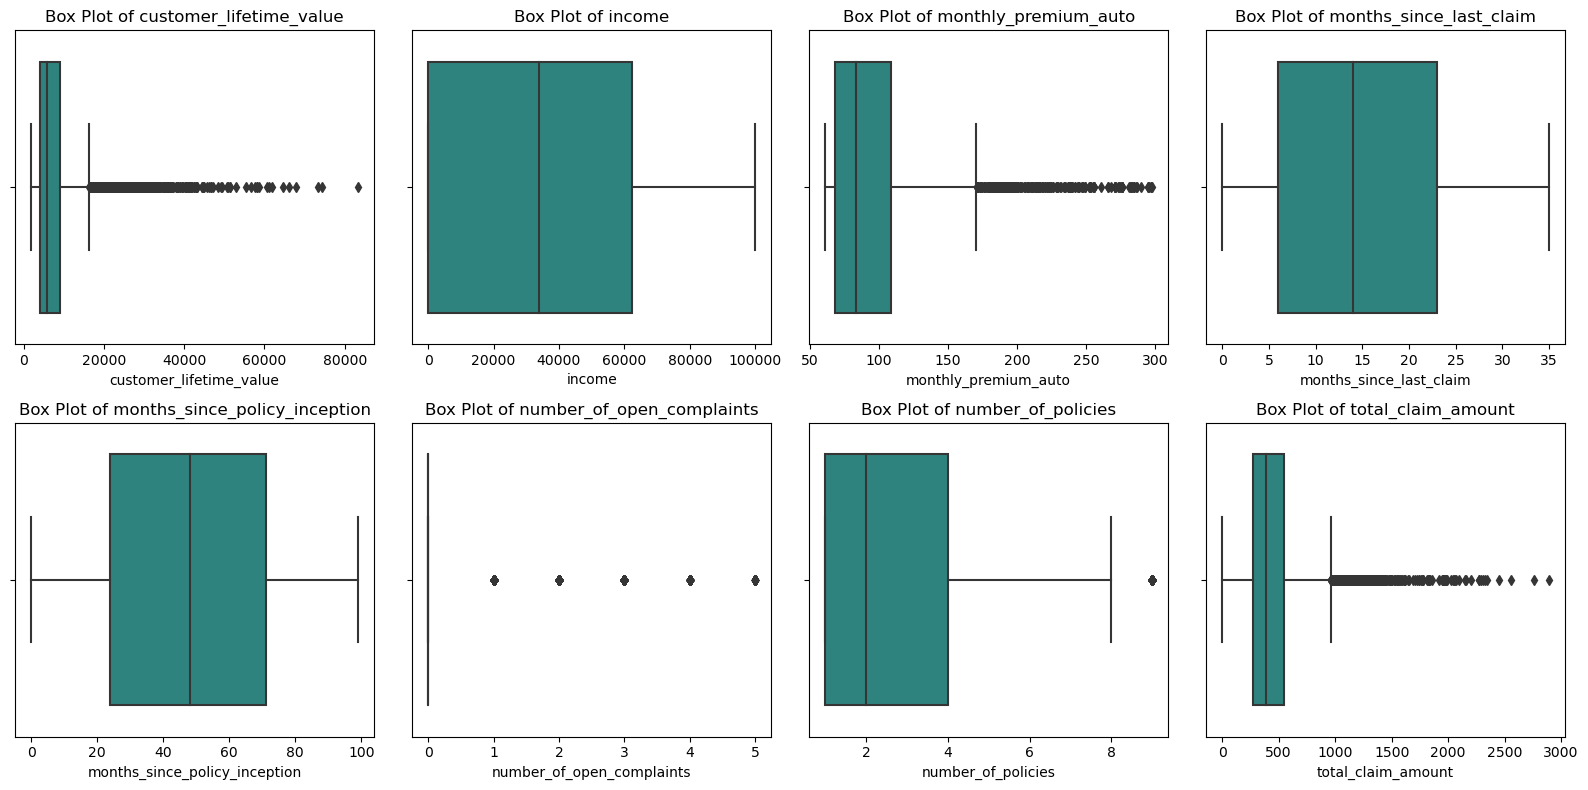

In [36]:
continuous_variables = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
                         'months_since_last_claim', 'months_since_policy_inception',
                         'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes = axes.flatten()

for i, variable in enumerate(continuous_variables):
    sns.boxplot(x=variable, data=customer_df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Box Plot of {variable}')

plt.tight_layout()
plt.show()

In [37]:
nan_counts = customer_df.isna().sum()

print("NaN counts in each column:")
print(nan_counts)

columns_with_nan = nan_counts[nan_counts > 0].index

if len(columns_with_nan) > 0:
    print("\nColumns with NaN values:")
    print(columns_with_nan)
else:
    print("\nNo columns with NaN values.")

NaN counts in each column:
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

No columns with NaN values.
